# **Advanced ML 2 - Final Project: Detecting Higgs bosons**

## **Léo RINGEISSEN & Santiago MARTIN**

# I- Pre-processing

## 1- Importing libraries

In [14]:
import numpy as np
import pandas as pd
import csv
import time
import math
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn import model_selection
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

## 2- Reading CSV files
Data set available in http://opendata.cern.ch/record/328

**If the dataset is very large, you can select a sub-sample to work with.**.

In [15]:

dataFilename = 'atlas-higgs-challenge-2014-v2.csv'
data = pd.read_csv(dataFilename)
print(data.shape)
print(data.dtypes)
data.head()

(818238, 35)
EventId                          int64
DER_mass_MMC                   float64
DER_mass_transverse_met_lep    float64
DER_mass_vis                   float64
DER_pt_h                       float64
DER_deltaeta_jet_jet           float64
DER_mass_jet_jet               float64
DER_prodeta_jet_jet            float64
DER_deltar_tau_lep             float64
DER_pt_tot                     float64
DER_sum_pt                     float64
DER_pt_ratio_lep_tau           float64
DER_met_phi_centrality         float64
DER_lep_eta_centrality         float64
PRI_tau_pt                     float64
PRI_tau_eta                    float64
PRI_tau_phi                    float64
PRI_lep_pt                     float64
PRI_lep_eta                    float64
PRI_lep_phi                    float64
PRI_met                        float64
PRI_met_phi                    float64
PRI_met_sumet                  float64
PRI_jet_num                      int64
PRI_jet_leading_pt             float64
PRI_jet_lead

,EventId,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,...,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt,Weight,Label,KaggleSet,KaggleWeight
0,100000,138.470,51.655,97.827,27.980,0.91,124.711,2.666,3.064,41.928,...,2.150,0.444,46.062,1.24,-2.475,113.497,0.000814,s,t,0.002653
1,100001,160.937,68.768,103.235,48.146,-999.00,-999.000,-999.000,3.473,2.078,...,0.725,1.158,-999.000,-999.00,-999.000,46.226,0.681042,b,t,2.233584
2,100002,-999.000,162.172,125.953,35.635,-999.00,-999.000,-999.000,3.148,9.336,...,2.053,-2.028,-999.000,-999.00,-999.000,44.251,0.715742,b,t,2.347389
3,100003,143.905,81.417,80.943,0.414,-999.00,-999.000,-999.000,3.310,0.414,...,-999.000,-999.000,-999.000,-999.00,-999.000,-0.000,1.660654,b,t,5.446378
4,100004,175.864,16.915,134.805,16.405,-999.00,-999.000,-999.000,3.891,16.405,...,-999.000,-999.000,-999.000,-999.00,-999.000,0.000,1.904263,b,t,6.245333


## 3- Delete superfluous columns
Use the `del` function to delete the 'EventId', 'Weight', 'KaggleSet', 'KaggleWeight' columns, then transform the 'label' column into 0/1 binary values.

In [16]:
del data['EventId']
del data['Weight']
del data['KaggleSet']
del data['KaggleWeight']
data['Label'] = data['Label'].apply(lambda x: 1 if x == 's' else 0)
data.head()

,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,DER_sum_pt,...,PRI_met_sumet,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt,Label
0,138.470,51.655,97.827,27.980,0.91,124.711,2.666,3.064,41.928,197.760,...,258.733,2,67.435,2.150,0.444,46.062,1.24,-2.475,113.497,1
1,160.937,68.768,103.235,48.146,-999.00,-999.000,-999.000,3.473,2.078,125.157,...,164.546,1,46.226,0.725,1.158,-999.000,-999.00,-999.000,46.226,0
2,-999.000,162.172,125.953,35.635,-999.00,-999.000,-999.000,3.148,9.336,197.814,...,260.414,1,44.251,2.053,-2.028,-999.000,-999.00,-999.000,44.251,0
3,143.905,81.417,80.943,0.414,-999.00,-999.000,-999.000,3.310,0.414,75.968,...,86.062,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,-0.000,0
4,175.864,16.915,134.805,16.405,-999.00,-999.000,-999.000,3.891,16.405,57.983,...,53.131,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,0.000,0


## 4- Dealing with missing data
Missing data in this file are designated -999. To replace them, use the `SimpleImputer` class.

In [17]:
# Handling missing data designated by -999
data = data.replace(-999, np.nan)
display(data.isnull().sum())

# Separating the data into features and labels
X = data.drop('Label', axis=1)
y = data['Label']

# Imputing missing values with median
imputer = SimpleImputer(strategy='median')
X_imputed = imputer.fit_transform(X)
X_imputed = pd.DataFrame(X_imputed, columns=X.columns)
display(X_imputed.isnull().sum())

DER_mass_MMC                   124602
DER_mass_transverse_met_lep         0
DER_mass_vis                        0
DER_pt_h                            0
DER_deltaeta_jet_jet           580253
DER_mass_jet_jet               580253
DER_prodeta_jet_jet            580253
DER_deltar_tau_lep                  0
DER_pt_tot                          0
DER_sum_pt                          0
DER_pt_ratio_lep_tau                0
DER_met_phi_centrality              0
DER_lep_eta_centrality         580253
PRI_tau_pt                          0
PRI_tau_eta                         0
PRI_tau_phi                         0
PRI_lep_pt                          0
PRI_lep_eta                         0
PRI_lep_phi                         0
PRI_met                             0
PRI_met_phi                         0
PRI_met_sumet                       0
PRI_jet_num                         0
PRI_jet_leading_pt             327371
PRI_jet_leading_eta            327371
PRI_jet_leading_phi            327371
PRI_jet_subl

DER_mass_MMC                   0
DER_mass_transverse_met_lep    0
DER_mass_vis                   0
DER_pt_h                       0
DER_deltaeta_jet_jet           0
DER_mass_jet_jet               0
DER_prodeta_jet_jet            0
DER_deltar_tau_lep             0
DER_pt_tot                     0
DER_sum_pt                     0
DER_pt_ratio_lep_tau           0
DER_met_phi_centrality         0
DER_lep_eta_centrality         0
PRI_tau_pt                     0
PRI_tau_eta                    0
PRI_tau_phi                    0
PRI_lep_pt                     0
PRI_lep_eta                    0
PRI_lep_phi                    0
PRI_met                        0
PRI_met_phi                    0
PRI_met_sumet                  0
PRI_jet_num                    0
PRI_jet_leading_pt             0
PRI_jet_leading_eta            0
PRI_jet_leading_phi            0
PRI_jet_subleading_pt          0
PRI_jet_subleading_eta         0
PRI_jet_subleading_phi         0
PRI_jet_all_pt                 0
dtype: int

## 5- Outliers
Check the dataset for outliers by displaying the boxplots of all columns.

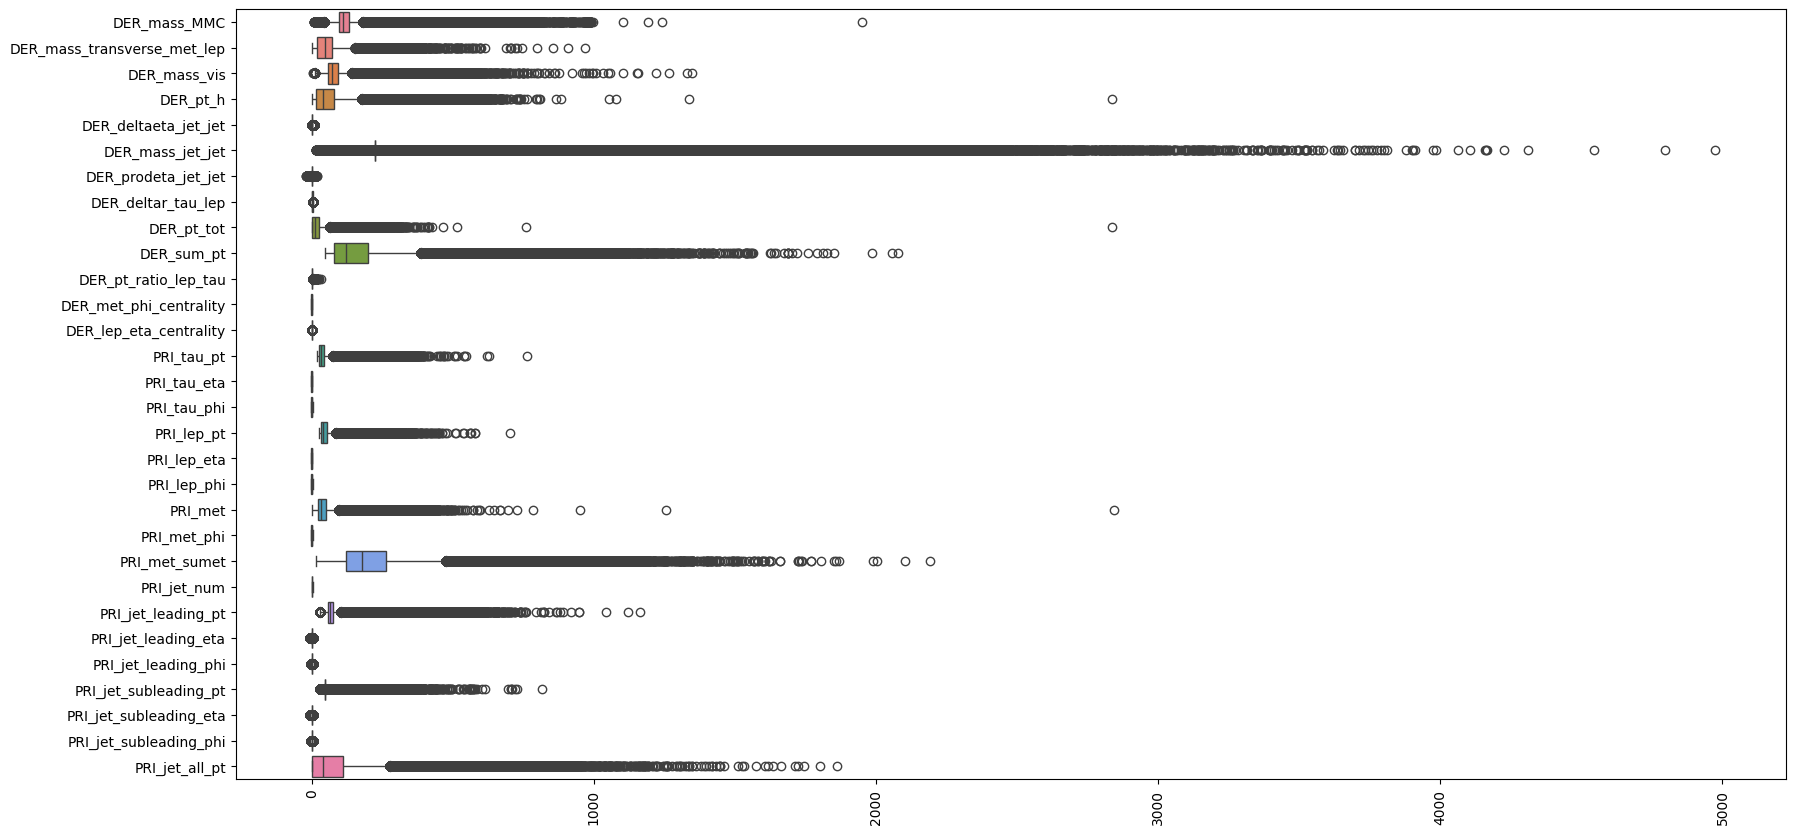

In [18]:
#boxplot display for different attributes
plt.figure(figsize=(20, 10))
sns.boxplot(data=X_imputed, orient='h')
plt.xticks(rotation=90)
plt.show()

## 6-  Data calibration with *MinMaxScaler* from Sci-kit Learn
Scale all columns with the "MinMaxScaler".

In [19]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X_imputed), columns=X_imputed.columns)
X_scaled.head()

,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,DER_sum_pt,...,PRI_met_phi,PRI_met_sumet,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt
0,0.066707,0.053326,0.068128,0.009869,0.10431,0.022395,0.591293,0.515244,0.014789,0.074595,...,0.455920,0.112586,0.666667,0.033028,0.738889,0.570656,0.020388,0.637778,0.106143,0.061014
1,0.078287,0.070992,0.072155,0.016983,0.24083,0.042849,0.511920,0.589031,0.000733,0.038884,...,0.195099,0.069314,0.333333,0.014316,0.580556,0.684278,0.022840,0.498778,0.496817,0.024850
2,0.053322,0.167417,0.089071,0.012570,0.24083,0.042849,0.511920,0.530399,0.003293,0.074622,...,0.152132,0.113359,0.333333,0.012573,0.728111,0.177276,0.022840,0.498778,0.496817,0.023789
3,0.069508,0.084050,0.055557,0.000146,0.24083,0.042849,0.511920,0.559625,0.000146,0.014690,...,0.509548,0.033256,0.000000,0.031550,0.500000,0.492998,0.022840,0.498778,0.496817,0.000000
4,0.085980,0.017462,0.095662,0.005787,0.24083,0.042849,0.511920,0.664442,0.005787,0.005843,...,0.361394,0.018126,0.000000,0.031550,0.500000,0.492998,0.022840,0.498778,0.496817,0.000000


## 7- Data Exploration 

### Crossing certain pairs of columns

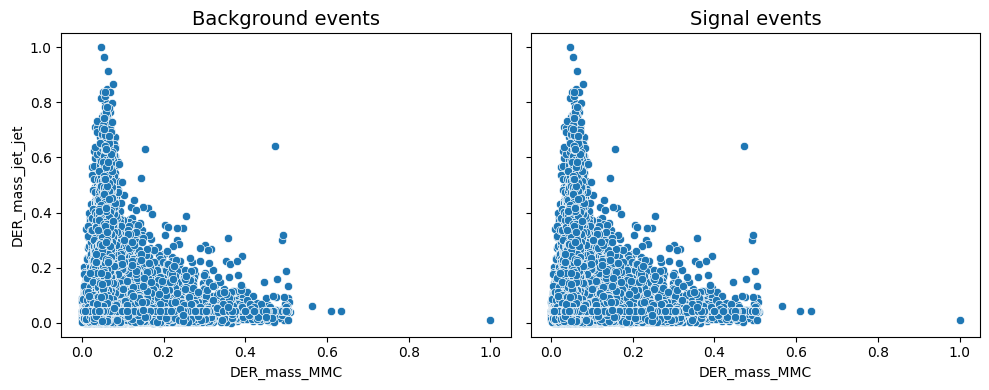

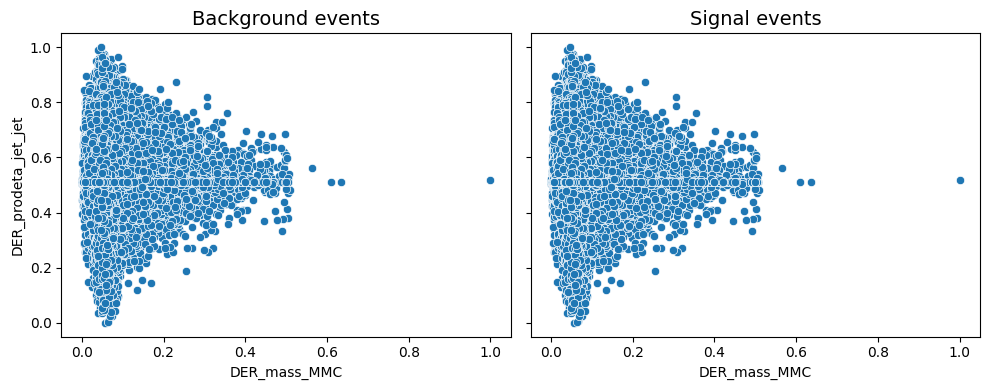

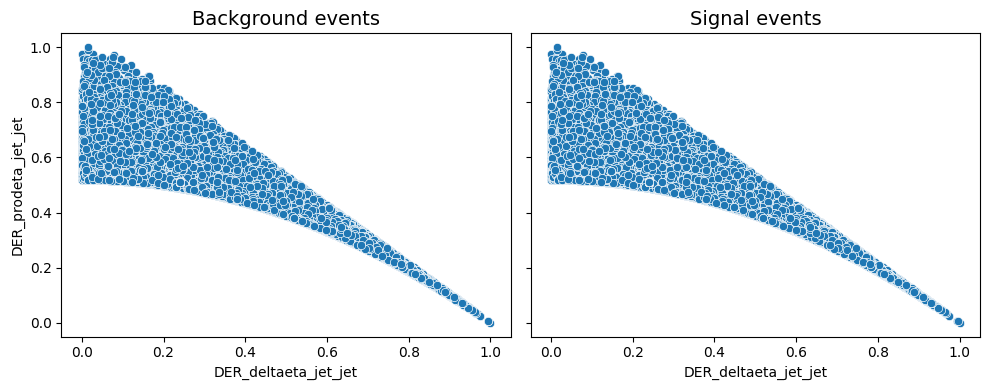

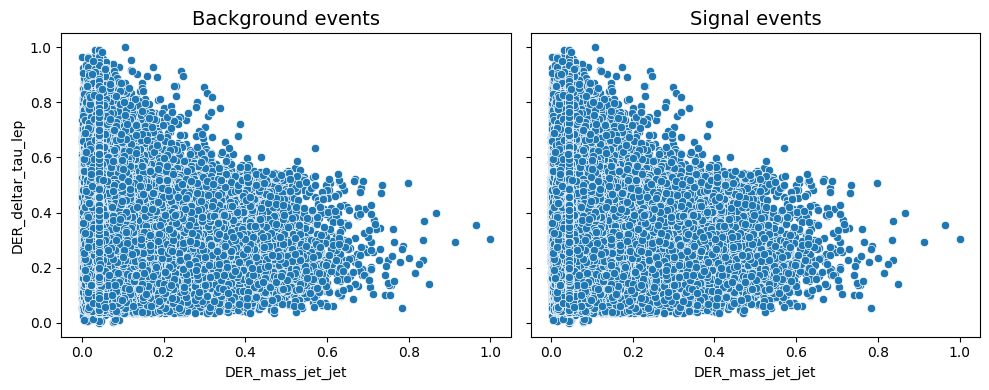

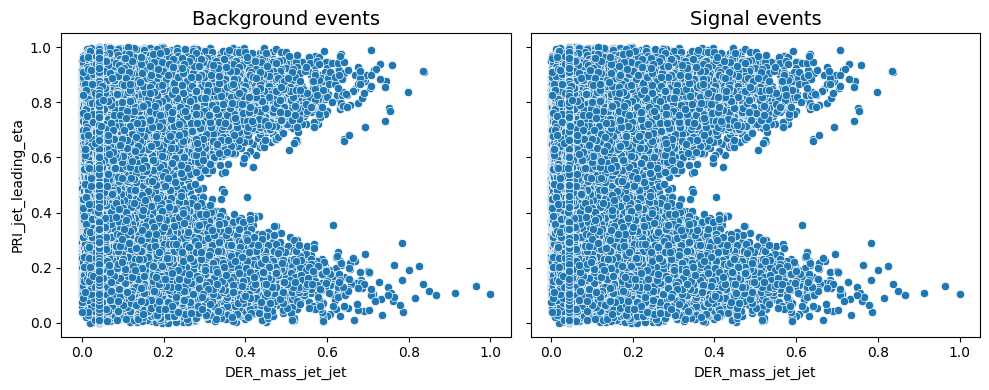

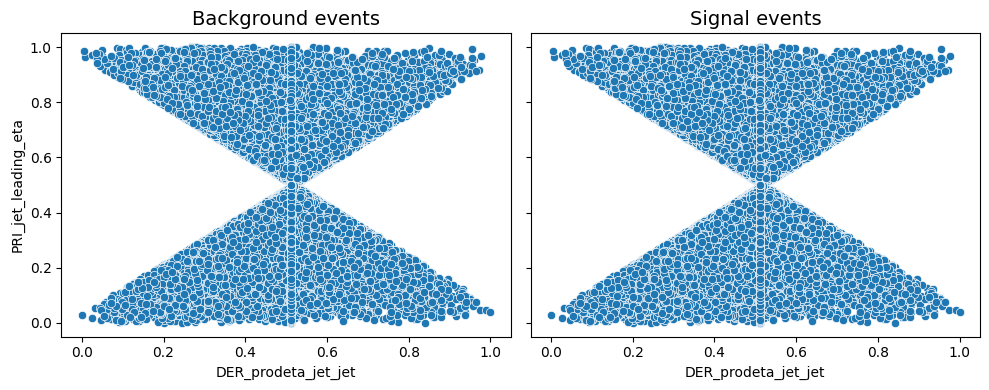

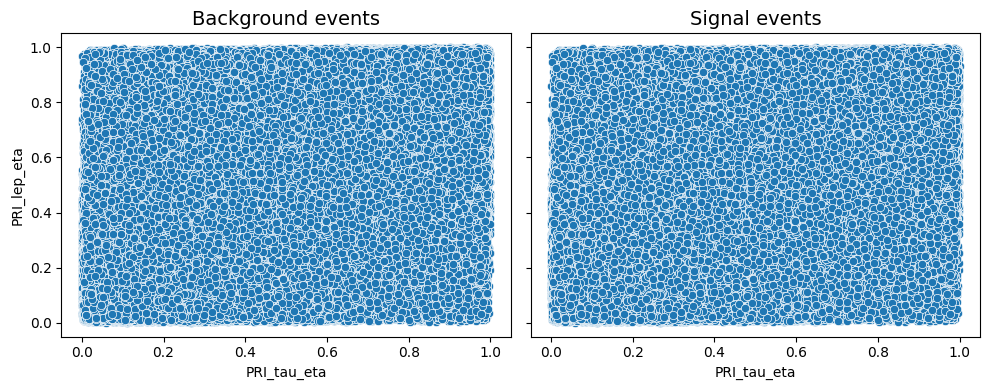

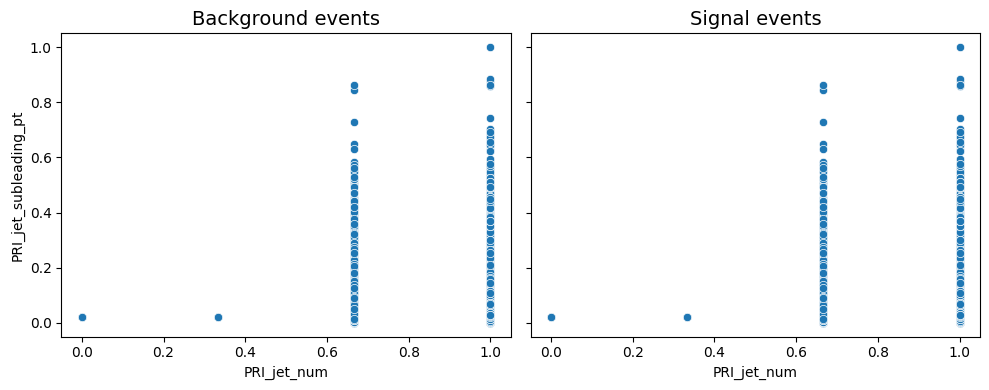

In [20]:

pairs_selected = [
    ('DER_mass_MMC', 'DER_mass_jet_jet'),
    ('DER_mass_MMC', 'DER_prodeta_jet_jet'),
    ('DER_deltaeta_jet_jet', 'DER_prodeta_jet_jet'),
    ('DER_mass_jet_jet', 'DER_deltar_tau_lep'),
    ('DER_mass_jet_jet', 'PRI_jet_leading_eta'),
    ('DER_prodeta_jet_jet', 'PRI_jet_leading_eta'),
    ('PRI_tau_eta', 'PRI_lep_eta'),
    ('PRI_jet_num', 'PRI_jet_subleading_pt')
]
for z in pairs_selected:
    fig, ax = plt.subplots(1, 2, figsize = (10, 4), sharex = True, sharey = True)
    sns.scatterplot(data = X_scaled, x = z[0], y = z[1], ax = ax[0])
    sns.scatterplot(data = X_scaled, x = z[0], y = z[1], ax = ax[1])
    ax[0].set_title("Background events", fontsize = 14)
    ax[1].set_title("Signal events", fontsize = 14)
    plt.tight_layout()

plt.show()

### Unbalance Ratio
Display the histogram of the target column to check the existence of a disequilibrium between the positive and negative classes.

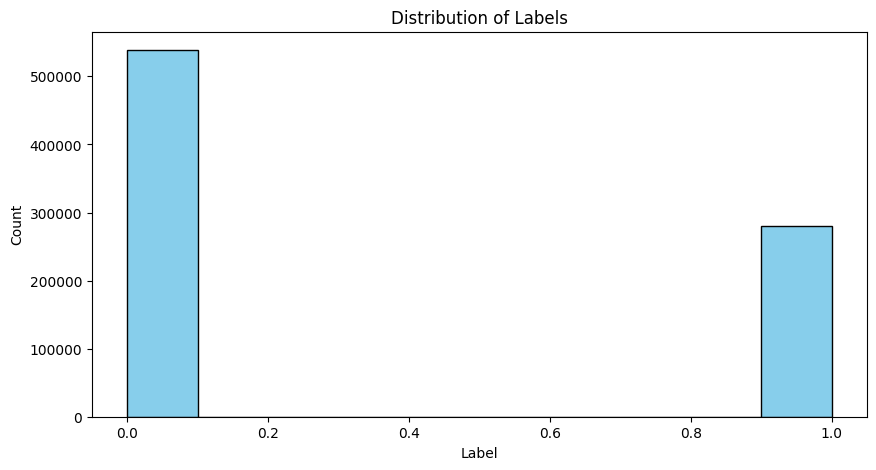

In [21]:
plt.figure(figsize=(10, 5))
plt.hist(y, color='skyblue', edgecolor='black')
plt.xlabel('Label')
plt.ylabel('Count')
plt.title('Distribution of Labels')
plt.show()

## 8- Apply a dimensionality reduction technique
Apply the PCA method to reduce training data size while retaining 90% variance.

In [22]:
#import PCA class
from sklearn.decomposition import PCA
#Apply decomposition with 90% variance
pca=PCA(n_components=0.9).fit(X_scaled)
#Transforming learning data
X_pca=pca.transform(X_scaled)
print("Original shape:{}".format(str(X_scaled.shape)))
print("Reduced shape:{}".format(str(X_pca.shape)))

Original shape:(818238, 30)
Reduced shape:(818238, 10)


## 9- Saving the preprocessed data

**Serves as a checkpoint for future uses to save time**

In [23]:
# Combine the PCA data with the target column and save it to a new CSV file for later use
X_pca = pd.DataFrame(X_pca)
X_pca['Label'] = y
X_pca.to_csv('dataset_preprocessed.csv', index=False)

## 10- Split data to Train and test

### Separate *input* data from *target* and split the dataset into train and test (30% for test).

In [26]:
import pandas as pd

df = pd.read_csv('dataset_preprocessed.csv')
print("Data shape: ", df.shape)
X = df.drop('Label', axis=1)
y = df['Label']

Data shape:  (818238, 11)


In [27]:
from sklearn.model_selection import train_test_split

#subdivision of test sample data = 30%.
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(572766, 10) (245472, 10) (572766,) (245472,)


### Creation of a list of performance measures for model comparison

In [28]:
#for saving results
list_accuracies=[]
list_F1=[]
list_recall=[]
list_precision=[]
list_times=[]

# II- Ensemble Learning

## 1- Bagging

### Random Forest
class sklearn.ensemble.RandomForestClassifier(n_estimators=100, *, criterion='gini', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='sqrt', max_leaf_nodes=None, min_impurity_decrease=0.0, bootstrap=True, oob_score=False, n_jobs=None, random_state=None, verbose=0, warm_start=False, class_weight=None, ccp_alpha=0.0, max_samples=None)

In [29]:
from sklearn.ensemble import RandomForestClassifier
#Random Forest Classifier
clf = RandomForestClassifier(n_estimators=100, criterion='gini', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='sqrt', max_leaf_nodes=None, min_impurity_decrease=0.0, bootstrap=True, oob_score=False, n_jobs=None, random_state=None, verbose=0, warm_start=False, class_weight=None, ccp_alpha=0.0, max_samples=None)
start_time = time.time()
clf.fit(x_train, y_train)
end_time = time.time()
y_pred = clf.predict(x_test)

### Plotting results

Accuracy:  0.7524564919827923
F1 Score:  0.5925722293369451
Recall:  0.5263289541074597
Precision:  0.6778909581812046
Time (s):  437.7939291000366
              precision    recall  f1-score   support

           0       0.78      0.87      0.82    161515
           1       0.68      0.53      0.59     83957

    accuracy                           0.75    245472
   macro avg       0.73      0.70      0.71    245472
weighted avg       0.74      0.75      0.74    245472



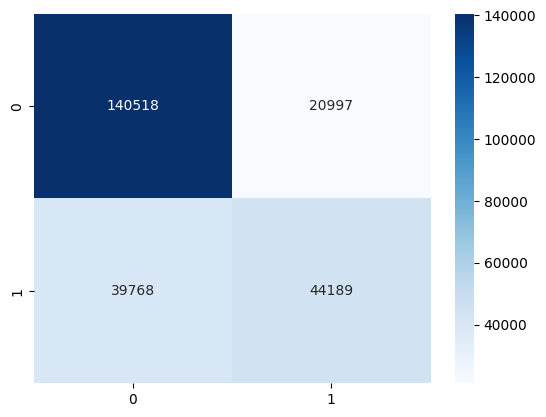

In [30]:
from sklearn.metrics import classification_report, confusion_matrix, f1_score, accuracy_score, recall_score, precision_score
import matplotlib.pyplot as plt
import seaborn as sns

# Accuracy and F1 Score
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
runtime = end_time - start_time
print("Accuracy: ", accuracy)
print("F1 Score: ", f1)
print("Recall: ", recall)
print("Precision: ", precision)
print("Time (s): ", runtime)
list_accuracies.append(accuracy)
list_F1.append(f1)
list_recall.append(recall)
list_precision.append(precision)
list_times.append(runtime)

#Classification Report and Confusion Matrix
print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.show()

## 2- Boosting

### Gradient Boost (Gradient Boosted Decision Trees)

This algorithm builds an additive model in a forward stage-wise fashion; it allows for the optimization of arbitrary differentiable loss functions. In each stage n_classes_ regression trees are fit on the negative gradient of the loss function, e.g. binary or multiclass log loss. Binary classification is a special case where only a single regression tree is induced.

class sklearn.ensemble.GradientBoostingClassifier(*, loss='log_loss', learning_rate=0.1, n_estimators=100, subsample=1.0, criterion='friedman_mse', min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_depth=3, min_impurity_decrease=0.0, init=None, random_state=None, max_features=None, verbose=0, max_leaf_nodes=None, warm_start=False, validation_fraction=0.1, n_iter_no_change=None, tol=0.0001, ccp_alpha=0.0)

In [31]:
from sklearn.ensemble import GradientBoostingClassifier
#Gradient Boosting Classifier
clf = GradientBoostingClassifier(loss='log_loss', learning_rate=0.1, n_estimators=100, subsample=1.0, criterion='friedman_mse', min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_depth=3, min_impurity_decrease=0.0, init=None, random_state=None, max_features=None, verbose=0, max_leaf_nodes=None, warm_start=False, validation_fraction=0.1, n_iter_no_change=None, tol=0.0001, ccp_alpha=0.0)
start_time = time.time()
clf.fit(x_train, y_train)
end_time = time.time()
y_pred = clf.predict(x_test)
list_times.append(end_time - start_time)

### Plotting Results

Accuracy:  0.727797875114066
F1 Score:  0.4881886144984374
Recall:  0.3795633479042843
Precision:  0.6839145831097757
Time (s):  332.158527135849
              precision    recall  f1-score   support

           0       0.74      0.91      0.81    161515
           1       0.68      0.38      0.49     83957

    accuracy                           0.73    245472
   macro avg       0.71      0.64      0.65    245472
weighted avg       0.72      0.73      0.70    245472



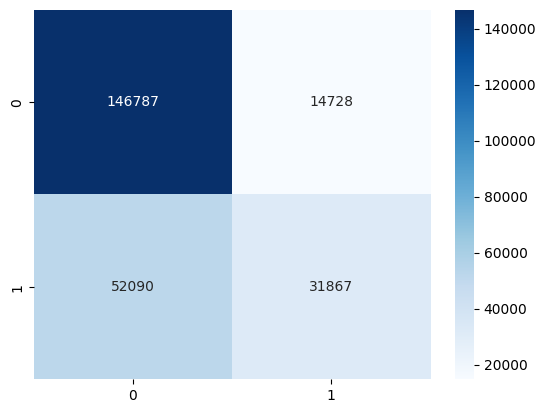

In [32]:
# Accuracy and F1 Score
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
runtime = end_time - start_time
print("Accuracy: ", accuracy)
print("F1 Score: ", f1)
print("Recall: ", recall)
print("Precision: ", precision)
print("Time (s): ", runtime)
list_accuracies.append(accuracy)
list_F1.append(f1)
list_recall.append(recall)
list_precision.append(precision)
list_times.append(runtime)

#Classification Report and Confusion Matrix
print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.show()

## 3- Comparing Ensemble Learning Results

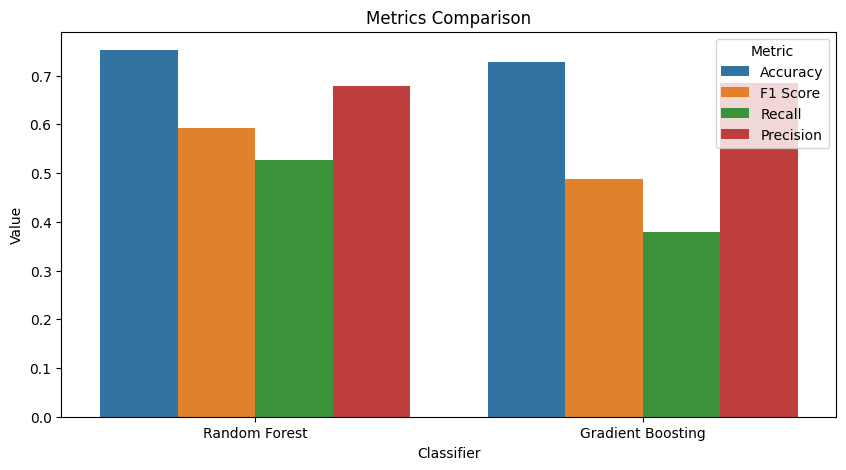

In [33]:
# Plotting and comparing results across our different metrics for the two classifiers
# Accuracy, Recall, Precision, and F1 Score can fit into a single plot after putting them in a DataFrame
# Time taken for each classifier can be plotted separately
import matplotlib.pyplot as plt
import seaborn as sns

# Create a DataFrame for the metrics
metrics = pd.DataFrame({
    'Classifier': ['Random Forest', 'Gradient Boosting'],
    'Accuracy': list_accuracies,
    'F1 Score': list_F1,
    'Recall': list_recall,
    'Precision': list_precision
})

# Melt the DataFrame to plot all metrics in a single plot
metrics_melted = pd.melt(metrics, id_vars='Classifier', var_name='Metric', value_name='Value')
plt.figure(figsize=(10, 5))
sns.barplot(x='Classifier', y='Value', hue='Metric', data=metrics_melted)
plt.title('Metrics Comparison')
plt.show()